In [1]:
import numpy as np
import bilby
import gwpy
import sys
sys.path.insert(0,'..')
import pygwb.util
from pygwb.simulator import Simulator
from scipy import optimize

# Inject a power spectrum in randomised LIGO noise

### injection of a broken power law 

In [2]:
frequencies_x = np.linspace(0, 1000, 10000)

alpha1 = 6
alpha2 = 0
fref = 10
omegaRef = 5.e-5

def IntensityGW(freqs, omegaRef, alpha1, fref, alpha2 = 2/3):
    ''' GW Intensity function from broken power law in OmegaGW '''
    '''
    
    PARAMETERS
    freqs: np.array
        frequency array
    fref: 
        reference frequency
    omegaRef: 
        Value of OmegaGW at reference frequency
    alpha1:
        first spectral index
    alpha2:
        second spectral index
        
    RETURN
    FrequencySeries
    
    '''
    from pygwb.constants import H0
    H_theor = (3 * H0 ** 2) / (10 * np.pi ** 2)
    
    fknee = fref
    
    power = np.zeros_like(freqs)
    
    power[freqs<fknee] = H_theor * omegaRef * (freqs[freqs<fknee]) ** (alpha1 -3) * fref**(-alpha1)
    power[freqs>fknee] = H_theor * omegaRef * (freqs[freqs>fknee]) ** (alpha2 - 3) * fref**(-alpha2)
    power[freqs==fknee] = H_theor * omegaRef * (fknee) ** (alpha2 -3) * fref**(-alpha2)
    
    #power[freqs<10.]= omegaRef * (10. / fref) ** alpha1
    power[0] = power[1]
    
    return gwpy.frequencyseries.FrequencySeries(power, frequencies=freqs)

Intensity_GW_inject = IntensityGW(frequencies_x, omegaRef = omegaRef, alpha1 = alpha1, fref = fref)

### set up bilby interferometers and initialise Simulator

In [3]:
sampling_frequency = 1024
duration = 60

ifo_H1 = bilby.gw.detector.get_empty_interferometer('H1')
ifo_L1 = bilby.gw.detector.get_empty_interferometer('L1')

ifo_list = [ifo_H1, ifo_L1]

for ifo in ifo_list:
    ifo.duration = duration
    ifo.sampling_frequency = sampling_frequency
    ifo.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(ifo.frequency_array, np.nan_to_num(ifo.power_spectral_density_array, posinf=1.e-41))

simulator_1 = Simulator(ifo_list, Intensity_GW_inject, 60, duration = duration, sampling_frequency = sampling_frequency)
dataset = simulator_1.generate_data()

(30721,)
(30721,)
H1:SIM-STOCH_INJ
L1:SIM-STOCH_INJ


### check out one minute of data

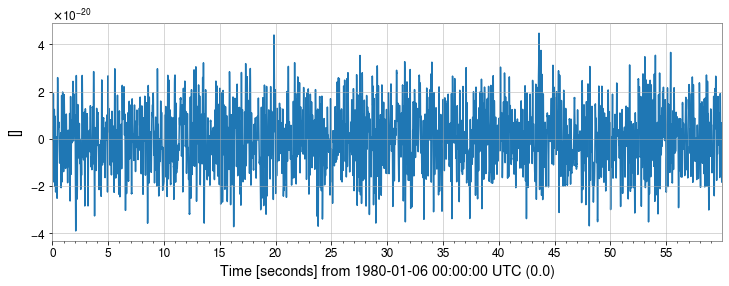

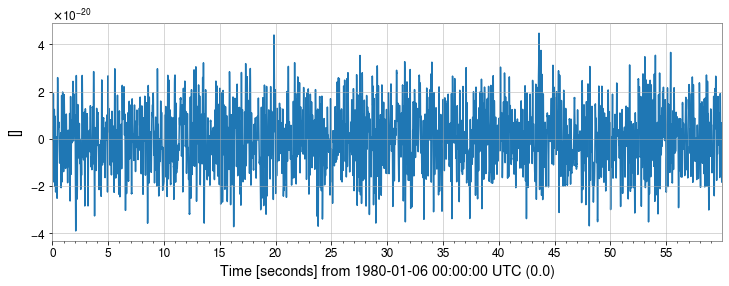

In [4]:
from gwpy.timeseries import TimeSeries

data_H1, data_L1 = dataset

crop_start_time = data_H1.t0.value
crop_duration   = 60
dt = data_H1.dt

data_H1_1min = data_H1.crop(start = crop_start_time, end = crop_start_time + crop_duration)
data_H1_1min.plot()

Text(0, 0.5, 'PSD')

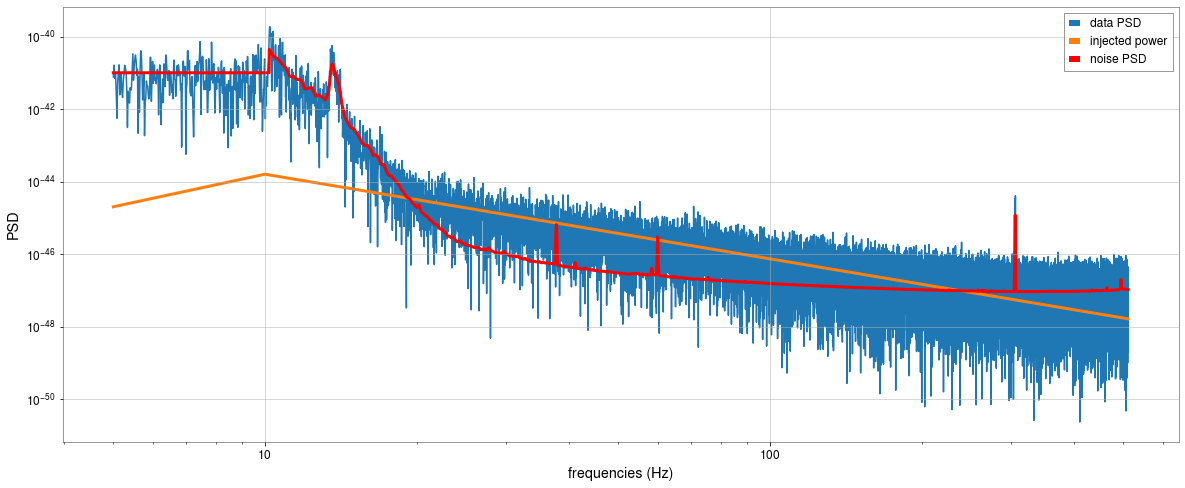

In [5]:
import matplotlib.pyplot as plt

frequencies = data_H1_1min.psd().frequencies.value

mask = frequencies>5.

ax, fig = plt.subplots(figsize = (20,8))
plt.loglog(frequencies[mask], data_H1_1min.psd().value[mask], label = 'data PSD')
plt.loglog(frequencies[mask], simulator_1.intensity_GW[mask], linewidth = 3, label = 'injected power')
plt.loglog(frequencies[mask], simulator_1.noise_PSD_array[0][mask], linewidth = 3, color = 'red', label = 'noise PSD')
plt.legend()
plt.xlabel('frequencies (Hz)')
plt.ylabel('PSD')

### Simple injection recovery test

In [6]:
#Function to fit the data to
def func(x,a,b):
    return 10**(a*np.log10(x)+b)

In [7]:
Ntests=200

psd_array_H1=np.zeros(Ntests, dtype=gwpy.frequencyseries.FrequencySeries)
# psd_array_L1=np.zeros(Ntests)

# spectral_array=np.zeros(Ntests)
# intercept_array=np.zeros(Ntests)
# mask1=(frequencies>20)&(frequencies<200)

for ii in range(Ntests):
    simulator_1 = Simulator(ifo_list, Intensity_GW_inject, 5, duration = duration, sampling_frequency = sampling_frequency)
    dataset = simulator_1.generate_data()
    data_H1, data_L1 = dataset
    
    psd_array_H1[ii]=data_H1.psd()

(30721,)
(30721,)
H1:SIM-STOCH_INJ
L1:SIM-STOCH_INJ
(30721,)
(30721,)
H1:SIM-STOCH_INJ
L1:SIM-STOCH_INJ
(30721,)
(30721,)
H1:SIM-STOCH_INJ
L1:SIM-STOCH_INJ
(30721,)
(30721,)
H1:SIM-STOCH_INJ
L1:SIM-STOCH_INJ
(30721,)
(30721,)
H1:SIM-STOCH_INJ
L1:SIM-STOCH_INJ
(30721,)
(30721,)
H1:SIM-STOCH_INJ
L1:SIM-STOCH_INJ
(30721,)
(30721,)
H1:SIM-STOCH_INJ
L1:SIM-STOCH_INJ
(30721,)
(30721,)
H1:SIM-STOCH_INJ
L1:SIM-STOCH_INJ
(30721,)
(30721,)
H1:SIM-STOCH_INJ
L1:SIM-STOCH_INJ
(30721,)
(30721,)
H1:SIM-STOCH_INJ
L1:SIM-STOCH_INJ
(30721,)
(30721,)
H1:SIM-STOCH_INJ
L1:SIM-STOCH_INJ
(30721,)
(30721,)
H1:SIM-STOCH_INJ
L1:SIM-STOCH_INJ
(30721,)
(30721,)
H1:SIM-STOCH_INJ
L1:SIM-STOCH_INJ
(30721,)
(30721,)
H1:SIM-STOCH_INJ
L1:SIM-STOCH_INJ
(30721,)
(30721,)
H1:SIM-STOCH_INJ
L1:SIM-STOCH_INJ
(30721,)
(30721,)
H1:SIM-STOCH_INJ
L1:SIM-STOCH_INJ
(30721,)
(30721,)
H1:SIM-STOCH_INJ
L1:SIM-STOCH_INJ
(30721,)
(30721,)
H1:SIM-STOCH_INJ
L1:SIM-STOCH_INJ
(30721,)
(30721,)
H1:SIM-STOCH_INJ
L1:SIM-STOCH_INJ
(30721,)
(30

In [11]:
freqs_1=psd_array_H1[0].frequencies.value
mask_1=(freqs_1>25)&(freqs_1<100)

psd_average=np.zeros(psd_array_H1[0].frequencies.value.shape)
# psd_array_L1=np.zeros(Ntests)

# spectral_array=np.zeros(Ntests)
# intercept_array=np.zeros(Ntests)
# mask1=(frequencies>20)&(frequencies<200)

for ii in range(Ntests):
    psd_average+=1/Ntests*psd_array_H1[ii].value

popt,pcov=optimize.curve_fit(func,freqs_1[mask_1],psd_average[mask_1])

spectral_avg=popt[0]
intercept_avg=popt[1]

In [18]:
from pygwb.constants import H0
H_theor = (3 * H0 ** 2) / (10 * np.pi ** 2)

omegaRef_avg=func(fref,spectral_avg,intercept_avg)/H_theor*fref**3

print(f"fit spectral index from PSD average: {spectral_avg}")
print(f"fit Omega(fref) from PSD average: {omegaRef_avg}")
print(f"% difference between spectral indices: {np.abs((spectral_avg-(2/3-3))/(2/3-3))}")
print(f"% difference between Omega(fref): {np.abs(omegaRef-omegaRef_avg)/omegaRef}")

fit spectral index from PSD average: -2.3113147115548576
fit Omega(fref) from PSD average: 5.302671464027867e-05
% difference between spectral indices: 0.00943655219077539
% difference between Omega(fref): 0.0605342928055734


Text(0, 0.5, 'PSD')

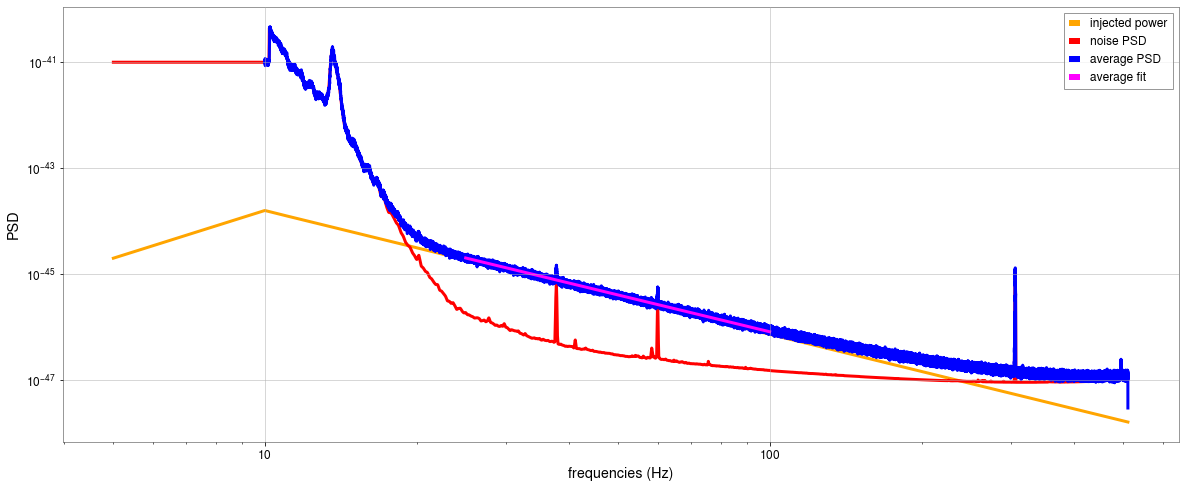

In [28]:
mask_2=(freqs_1>10)&(freqs_1<freqs_1[-1])

ax, fig = plt.subplots(figsize = (20,8))
plt.loglog(frequencies[mask], simulator_1.intensity_GW[mask], linewidth = 3, label = 'injected power',color='orange')
plt.loglog(frequencies[mask], simulator_1.noise_PSD_array[0][mask], linewidth = 3, color = 'red', label = 'noise PSD')
plt.loglog(freqs_1[mask_2], psd_average[mask_2], linewidth = 3, color = 'blue', label = 'average PSD')
plt.loglog(freqs_1[mask_1], func(freqs_1[mask_1],spectral_avg,intercept_avg), linewidth = 3, color = 'magenta', label = 'average fit')
plt.legend()
plt.xlabel('frequencies (Hz)')
plt.ylabel('PSD')